In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

nc_filebase = 'agg_macav2*'

In [3]:
ds_ens = xr.open_mfdataset(nc_filebase,
                          combine ='nested',
                          concat_dim='ens')
ds_ens

<xarray.Dataset>
Dimensions:        (ens: 5, time: 1128, lat: 49, lon: 73)
Coordinates:
  * time           (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat            (lat) float64 46.48 46.52 46.56 46.6 ... 48.4 48.44 48.48
  * lon            (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.5 245.5
Dimensions without coordinates: ens
Data variables:
    precipitation  (ens, time, lat, lon) float32 dask.array<chunksize=(1, 1128, 49, 73), meta=np.ndarray>
Attributes: (12/48)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326
    Conventions:                     CF-1.0
    History:                         Translated to CF-1.0 Conventions by Netc...

In [4]:
ds_ens['precipitation'] 

<xarray.DataArray 'precipitation' (ens: 5, time: 1128, lat: 49, lon: 73)>
dask.array<concatenate, shape=(5, 1128, 49, 73), dtype=float32, chunksize=(1, 1128, 49, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat      (lat) float64 46.48 46.52 46.56 46.6 ... 48.35 48.4 48.44 48.48
  * lon      (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.4 245.5 245.5
Dimensions without coordinates: ens
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

In [5]:
ds_ens['precipitation'].mean(dim='ens') 

<xarray.DataArray 'precipitation' (time: 1128, lat: 49, lon: 73)>
dask.array<mean_agg-aggregate, shape=(1128, 49, 73), dtype=float32, chunksize=(1128, 49, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat      (lat) float64 46.48 46.52 46.56 46.6 ... 48.35 48.4 48.44 48.48
  * lon      (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.4 245.5 245.5

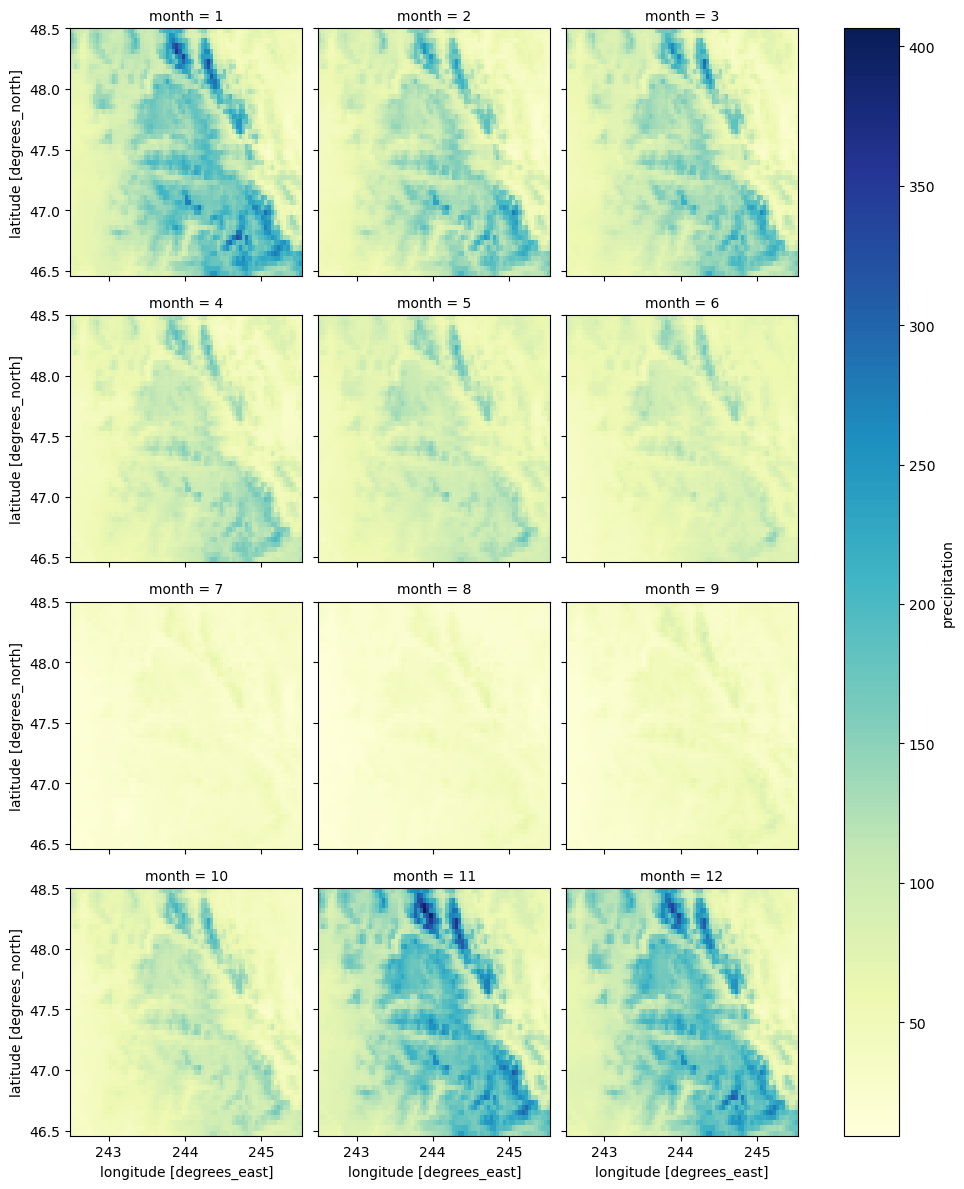

In [8]:
ds_ens['precipitation'].mean(dim='ens').groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3,cmap='YlGnBu')

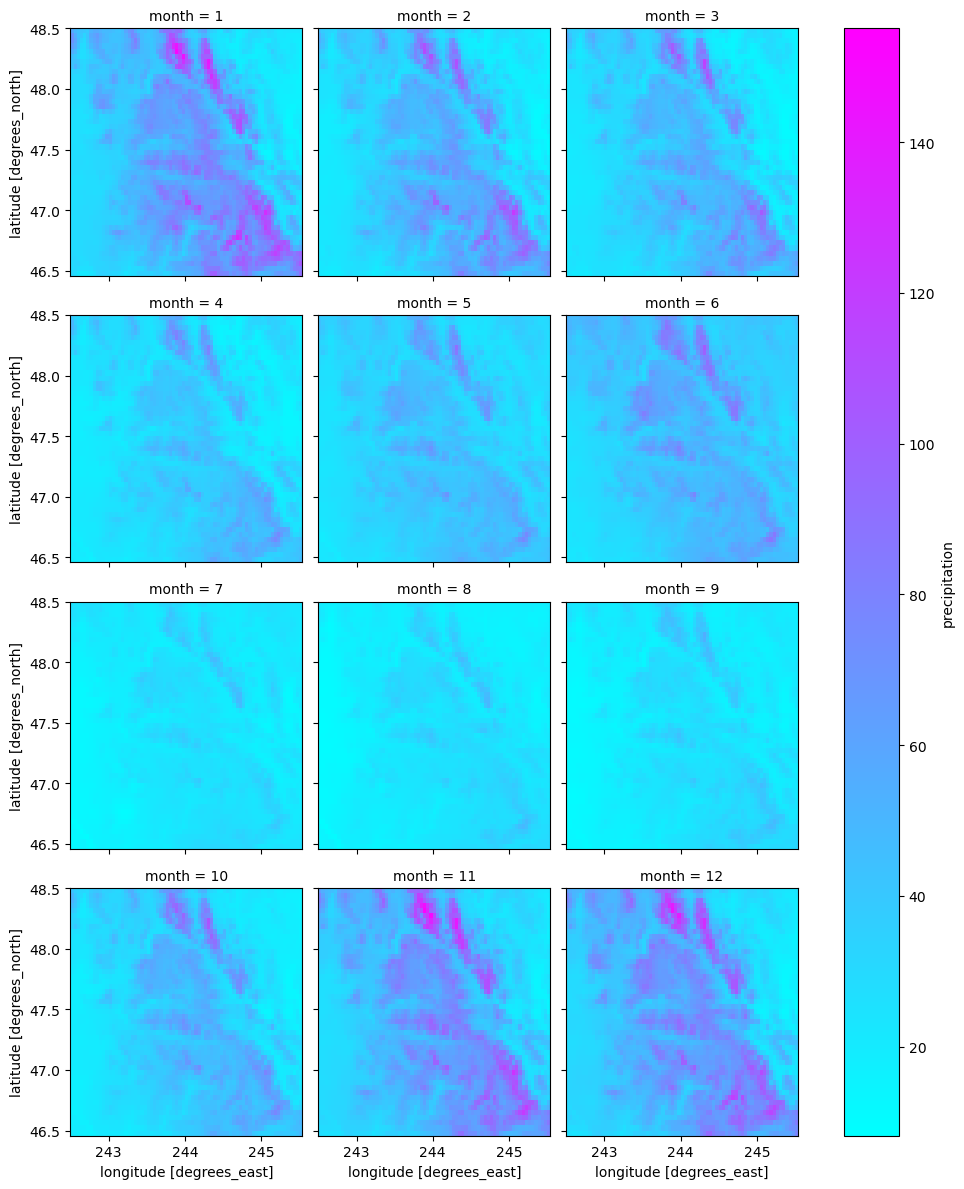

In [9]:
ds_ens['precipitation'].std(dim='ens').groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3,cmap='cool')

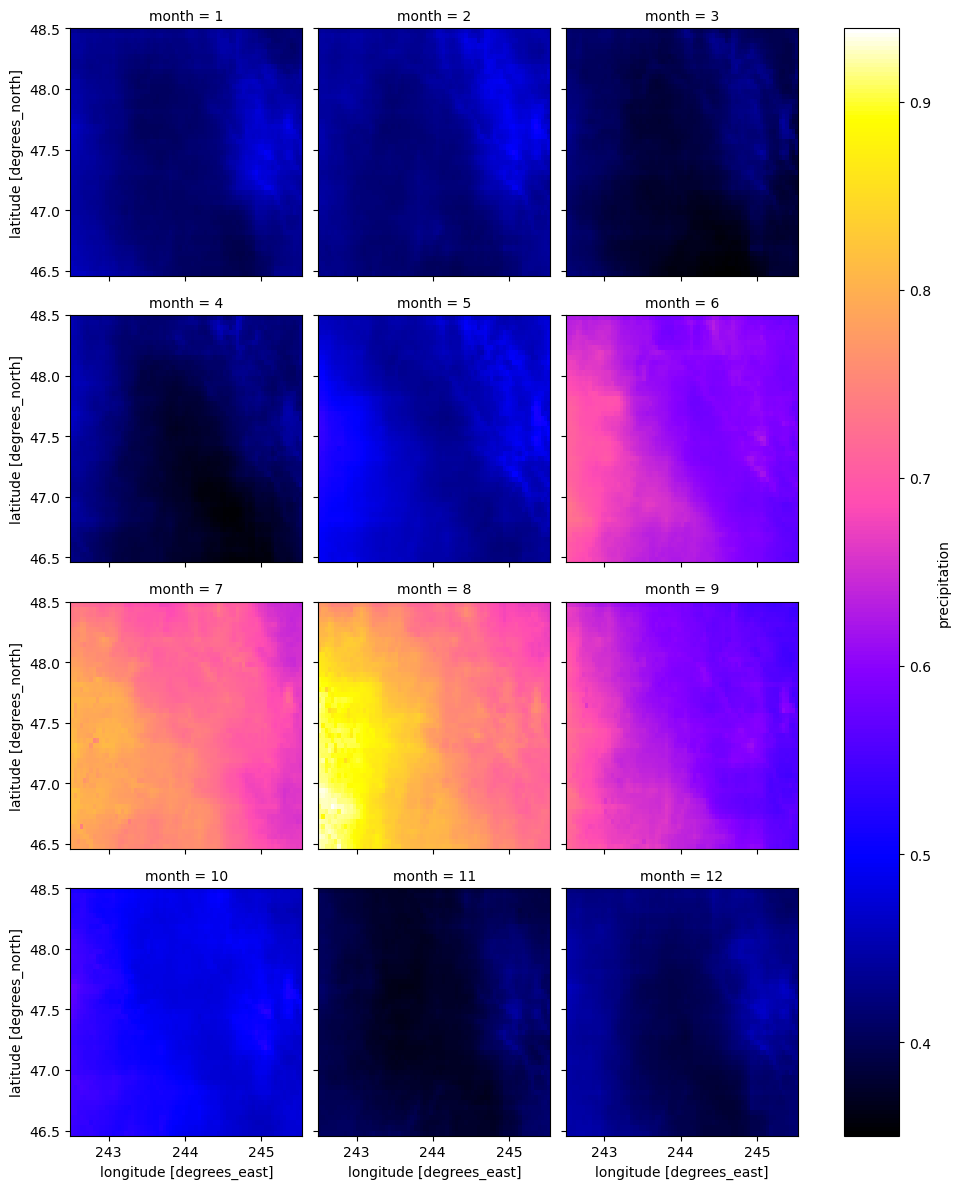

In [10]:
(ds_ens['precipitation'].std(dim='ens')/ds_ens['precipitation'].mean(dim='ens')).groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3,cmap='gnuplot2')